You are tasked with analyzing data about heart disease condition. You are to create EDA and modeling about the data.

Task
Data Preparation / Cleaning
EDA
Compare two different variables and provide short analysis (ex: gender and sex, gender and cp, cp and chol, etc.)
Create model for analysis (Classification). Use XGBoost, K-Nearest Neighbor, Logistic Regression, Gaussian Naive Bayes, Bernoulli Naive Bayes, Support Vector Machine, Random Forest. (choose at least 3)
Create short conclusion about the modeling results
About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack


In [5]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
file_path = "/Users/jocelynleora_/Documents/Sem 5/Data mining/heart.csv"

warnings.filterwarnings('ignore')

import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

In [6]:
df=pd.read_csv(file_path)
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0 2.300000    0   
1   37    1   2     130   250    0        1       187     0 3.500000    0   
2   41    0   1     130   204    0        0       172     0 1.400000    2   
3   56    1   1     120   236    0        1       178     0 0.800000    2   
4   57    0   0     120   354    0        1       163     1 0.600000    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
list_col=['sex','chol','trtbps','cp','thall','exng']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

SEX :[1 0] 
CHOL :[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131] 
TRTBPS :[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 
CP :[3 2 1 0] 
THALL :[1 2 3 0] 
EXNG :[0 1] 


# EDA

Sex = 0 -> 96 and Sex = 1 -> 206


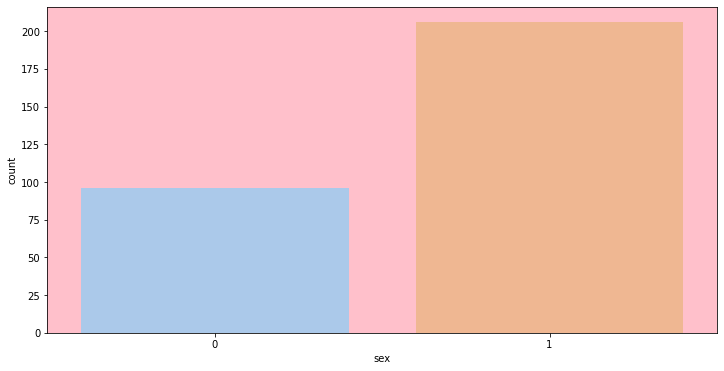

In [18]:
print(f'Sex = 0 -> {df.sex.value_counts()[0]} and Sex = 1 -> {df.sex.value_counts()[1]}')
plt.figure(figsize=(12,6))
ax=plt.axes()
ax.set_facecolor("pink")
p = sns.countplot(data=df, x="sex", palette='pastel')

Chest Pain Type Count


<AxesSubplot:xlabel='cp', ylabel='count'>

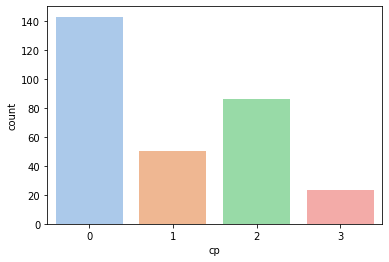

In [23]:
print("Chest Pain Type Count")
ax=plt.axis()
sns.countplot(x='cp', data=df, palette='pastel')

fbs category count


<AxesSubplot:xlabel='fbs', ylabel='count'>

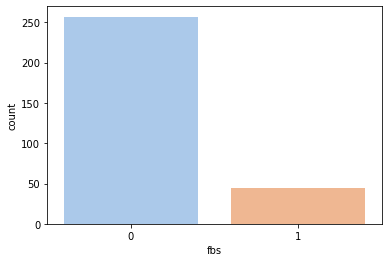

In [24]:
print("fbs category count")
sns.countplot(x='fbs', data=df, palette='pastel')

thall type count


<AxesSubplot:xlabel='thall', ylabel='count'>

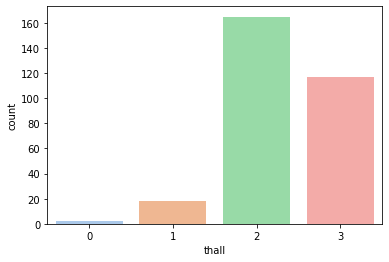

In [25]:
print("thall type count")
sns.countplot(x='thall', data=df, palette='pastel')

ecg type count


<AxesSubplot:xlabel='restecg', ylabel='count'>

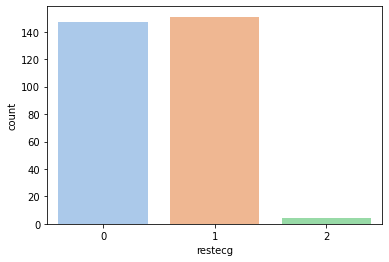

In [26]:
print("ecg type count")
sns.countplot(x='restecg', data=df, palette='pastel')

<AxesSubplot:xlabel='caa', ylabel='age'>

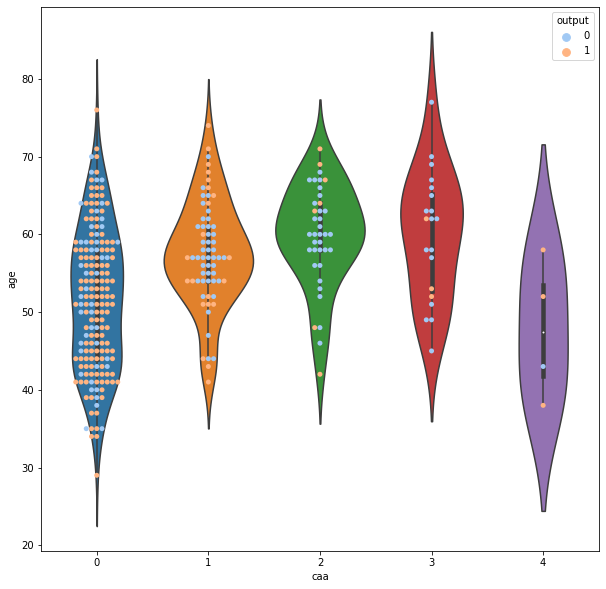

In [27]:
plt.figure(figsize = (10,10))
sns.violinplot(x='caa',y='age',data=df)
sns.swarmplot(x=df['caa'],y=df['age'],hue=df['output'], palette='pastel')

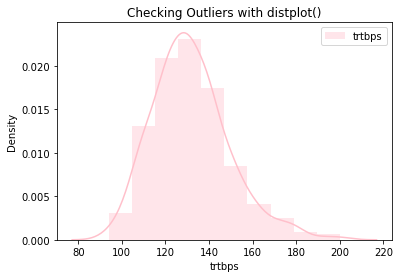

In [29]:
# OUTLIERS
sns.color_palette("pastel")
plt.title('Checking Outliers with distplot()')
sns.distplot(df.trtbps, label='trtbps', kde=True, bins=10, color='PINK')
plt.legend()

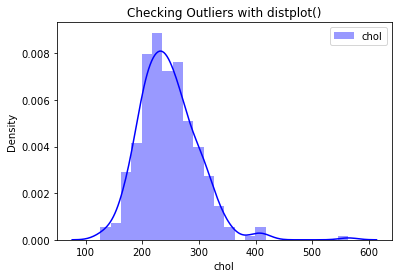

In [31]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df.chol, label='chol', kde=True, color='blue')
plt.legend()

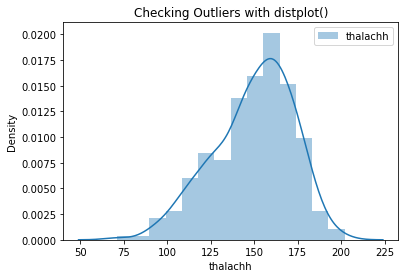

In [32]:
plt.title('Checking Outliers with distplot()')
sns.distplot(df['thalachh'],label='thalachh', kde=True )
plt.legend()

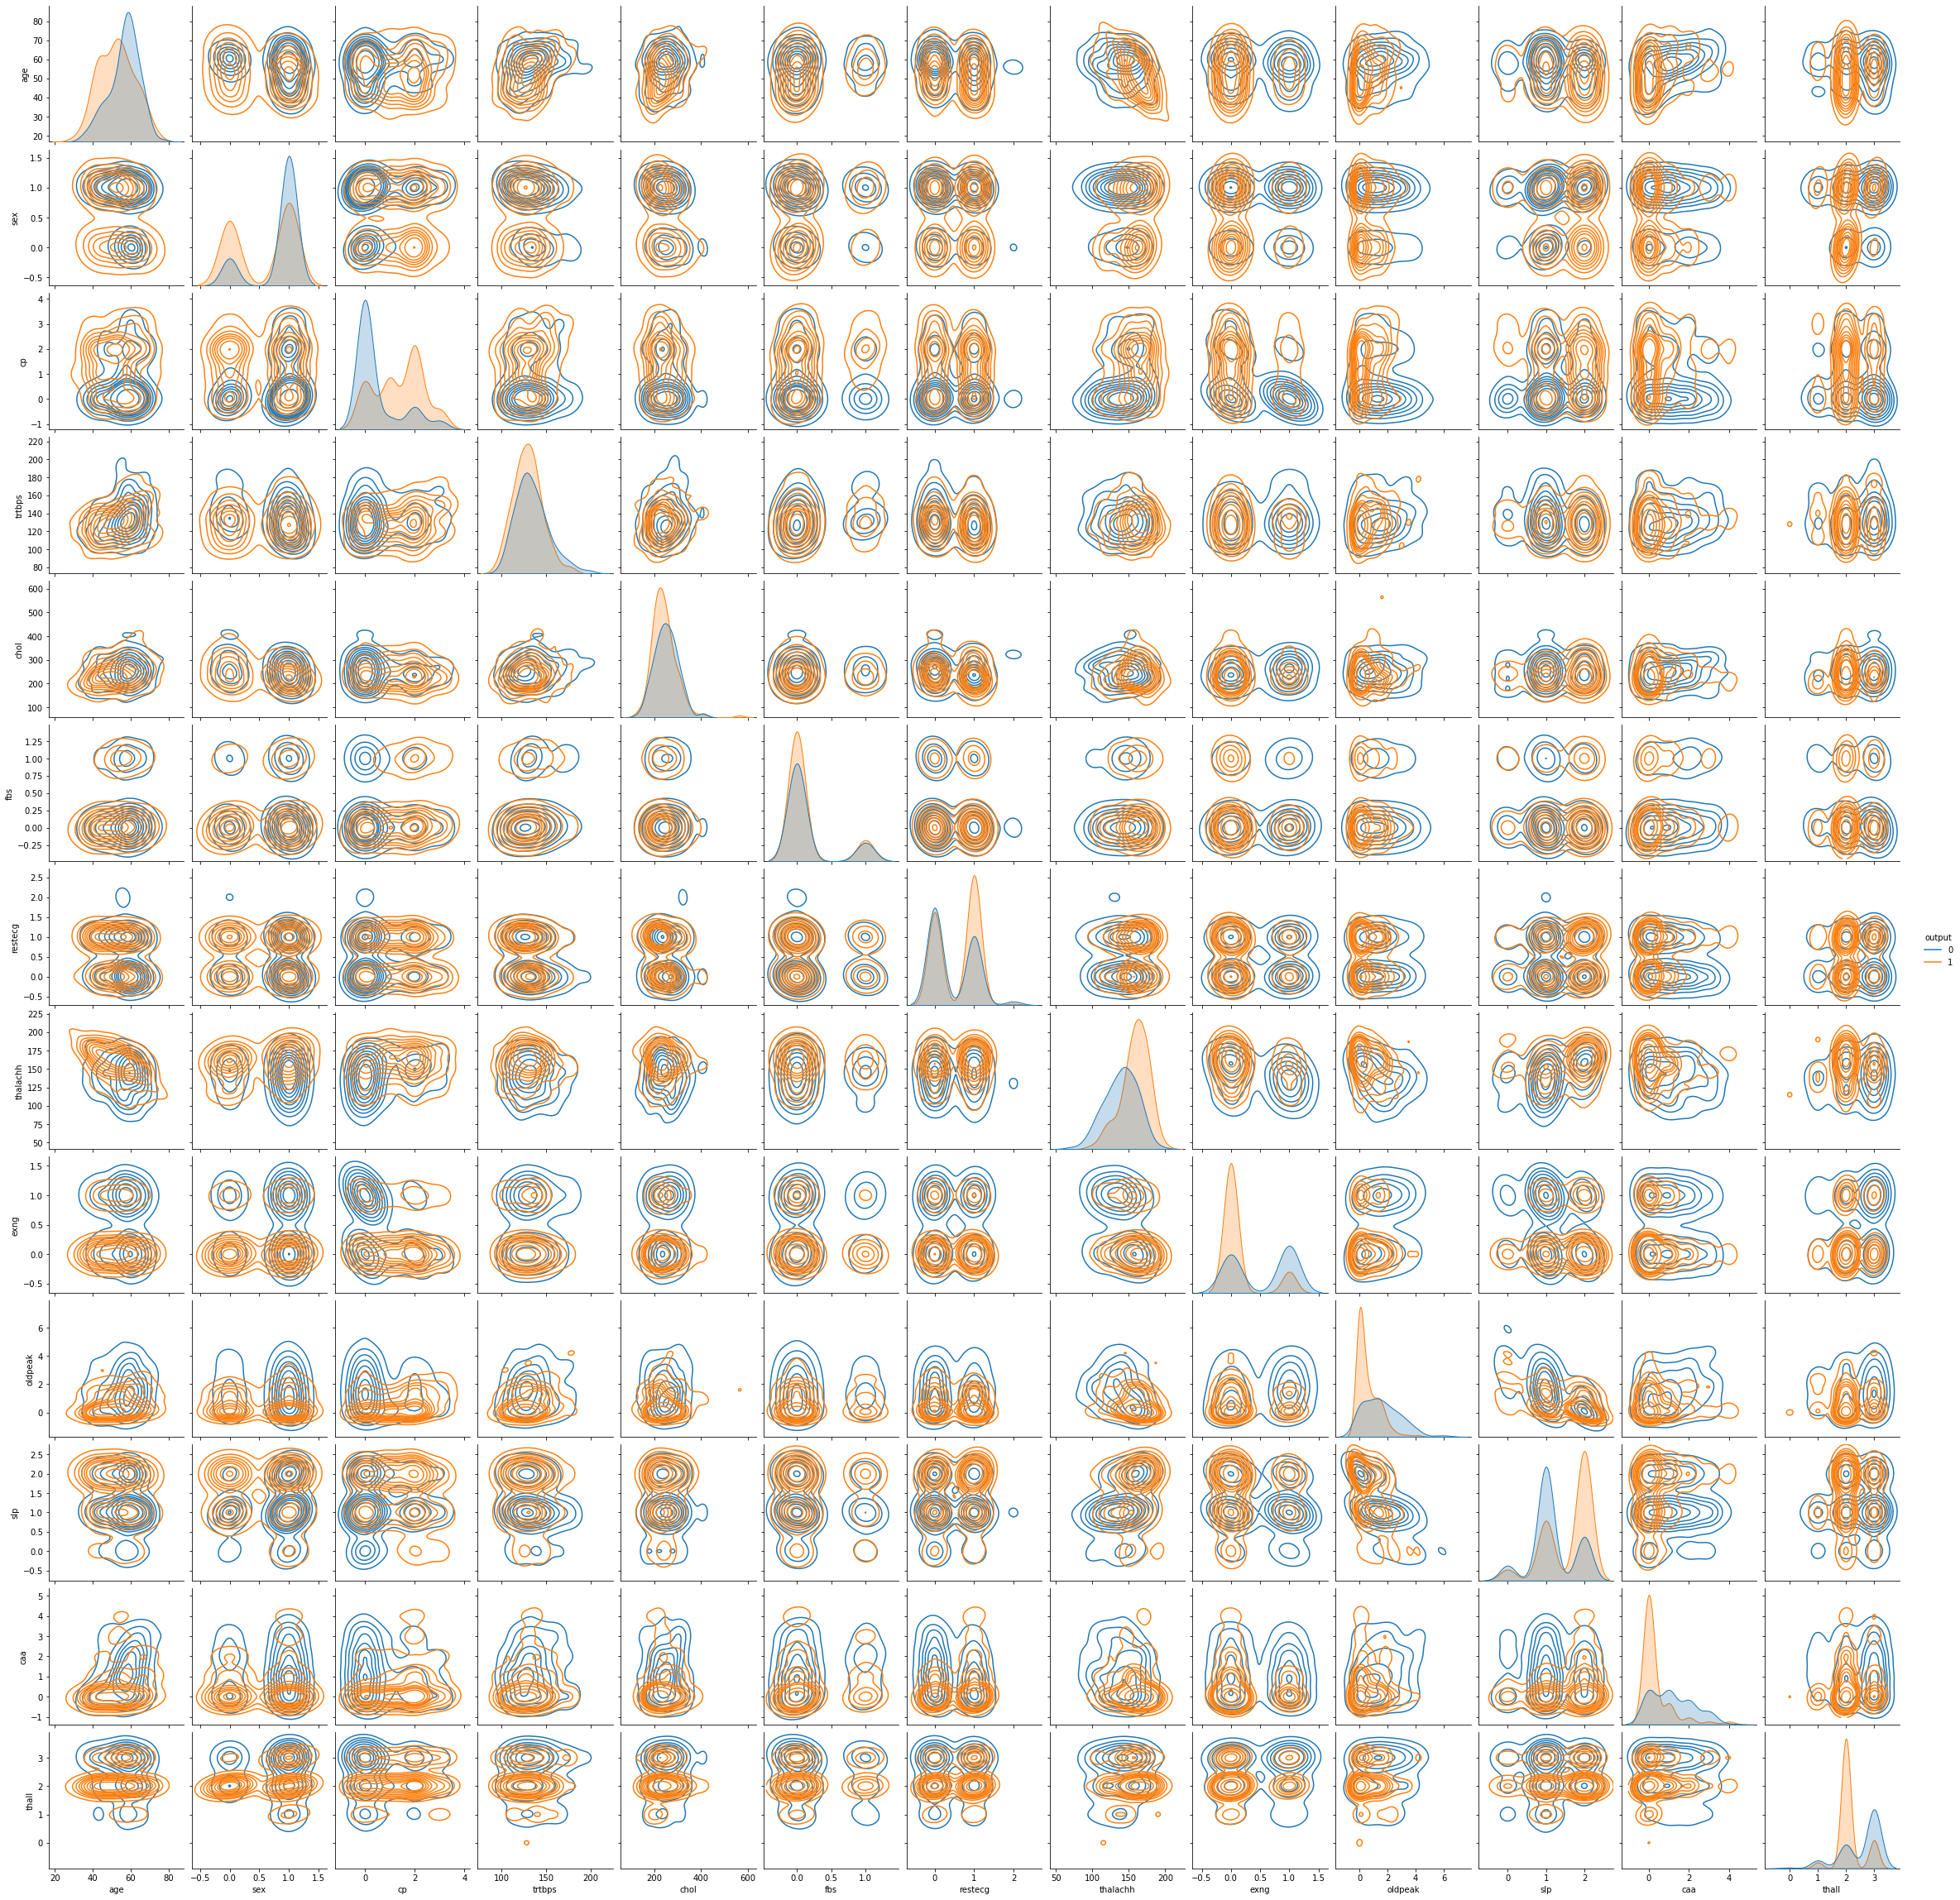

In [34]:
sns.pairplot(df,kind="kde",hue="output")

In [35]:
#spliting data into X and y

X=df.drop(["output"],axis=1)
y=df["output"]

In [38]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X[X.columns] = scalerX.fit_transform(X[X.columns])

# model building

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [39]:
# split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
ada_pre=ada.predict(X_test)
acc_ada = accuracy_score(y_test,ada_pre)
acc_ada

0.7868852459016393

In [41]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','XGBClassifier']
value = [LogisticRegression(random_state=9), KNeighborsClassifier(), xgb.XGBClassifier()]
models = dict(zip(key,value))
predicted = df['predicted_column']
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.8032786885245902
KNeighborsClassifier 0.819672131147541
SVC 0.7704918032786885


-- conclusion --

The result suggest that, among the models i've tested, the K-Nearest Neighbors (KNN) classifier performed the best in terms of accuracy on the given test data, with accuracy of approximately 81.97% 